In [90]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class MyLogisticRegression:
    """
    
    """
    def __init__(self, learning_rate = 0.05, max_iter = 1000):
        self.learning_rate = learning_rate
        self.max_iter = max_iter

    def _h(self, x):
        """
        h(x) = sigmoid of dot(x, weights)
        """
        return sigmoid(np.dot(x, self.w) + self.b)

    def _cost(self, x, y):
        """
        cost(h(x), y) -1/m * sum(y.log(h(x)) + (1 - y).log(1 - h(x)))
        """
        m = x.shape[0]
        return -(1/m) * np.sum(np.dot(y, np.log(self._h(x))) + 
        np.dot((1 - y), np.log(1 - self._h(x))))

    def _dw(self, x, y):
        m = x.shape[0]
        return (1/m) * np.dot(x.T, (self._h(x) - y))

    def _db(self, x, y):
        m = x.shape[0]
        return (1/m) * np.sum((self._h(x) - y)) 

    def fit(self, x, y):
        self.w = np.zeros((x.shape[1], 1))
        self.b = 0
        
        for _ in range(self.max_iter):
            self.w -= self.learning_rate * self._dw(x, y)
            self.b -= self.learning_rate * self._db(x, y)

        return self

    def predict(self, x): 
        preds = sigmoid(np.dot(x, self.w) + self.b)
        
        pred_class = []
        pred_class = [1 if i > 0.5 else 0 for i in preds]
        
        return np.array(pred_class)
    
    def score(self, X, y):
        """
        
        """
        y_pred = self.predict(X)
        correct = 0
        for i in range(len(y)):
            if y[i] == y_pred[i]:
                correct += 1
        return correct / len(y)

In [132]:
def normalize(X):
    
    # X --> Input.
    
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Normalizing all the n features of X.
    for i in range(n):
        X = (X - X.mean(axis=0))/X.std(axis=0)
        
    return X

(100, 2)
(100, 1)
(100, 2)
(100, 1)


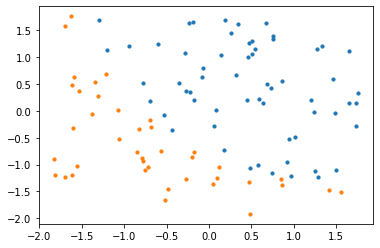

In [161]:
import matplotlib.pyplot as plt
import pandas as pd

def load_data(path, header):
    marks_df = pd.read_csv(path, header=header, dtype=float)
    return marks_df


# load the data from the file
data = load_data("../../datasets/marks.txt", None)

# X = feature values, all the columns except the last column
X = data.iloc[:, :-1]
X = normalize(X)

# y = target values, last column of the data frame
y = data.iloc[:, -1]

# filter out the applicants that got admitted
admitted = X[y == 1]

# filter out the applicants that din't get admission
not_admitted = X[y == 0]

X = data.iloc[:,:-1].values
y = data.iloc[:,-1:].values

print(X.shape)
print(y.shape)



# plots
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10,
            label='Not Admitted')

# preparing the data for building the model
#X = np.c_[np.ones((X.shape[0], 1)), X]
#y = y[:, np.newaxis]
#theta = np.zeros((X.shape[1], 1))
print(X.shape)
print(y.shape)

In [162]:
mlr = MyLogisticRegression(learning_rate=0.01)
mlr.fit(X, y)

In [163]:
print(mlr.w.shape)
print(mlr.b.shape)
parameters = mlr.w.T[0]
print(parameters.shape)
print(parameters)

(2, 1)
()
(2,)
[ 0.35859156 -0.11004103]


In [164]:
y_hat = mlr.predict(X)
print(y_hat)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [165]:
def plot_decision_boundary(X, w, b):
    w = w[:,np.newaxis]
    print(X.shape)
    print(w.shape)
    
    # X --> Inputs
    # w --> weights
    # b --> bias
    
    
    
    # The Line is y=mx+c
    # So, Equate mx+c = w.X + b
    # Solving we find m and c

    x1 = [min(X[:,0]), max(X[:,0])]
    print(x1)
    m = -w[0]/w[1]
    print(m)
    c = -b/w[1]
    print(c)
    #x2 = m*x1 + c
    x2 = np.array([m * x for x in x1]) + c
    print(x2)

    
    # Plotting
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0], X[:, 1], "g^")
    plt.plot(X[:, 0], X[:, 1], "bs")
    #plt.xlim([-2, 2])
    #plt.ylim([0, 2.2])
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Decision Boundary')
    plt.plot(x1, x2, 'y-')

In [166]:
print(X.shape)

(100, 2)


(100, 2)
(2, 1)
[30.05882244669796, 99.82785779692128]
[3.25870776]
[-7.01716091]
[[ 90.93575714]
 [318.29265425]]


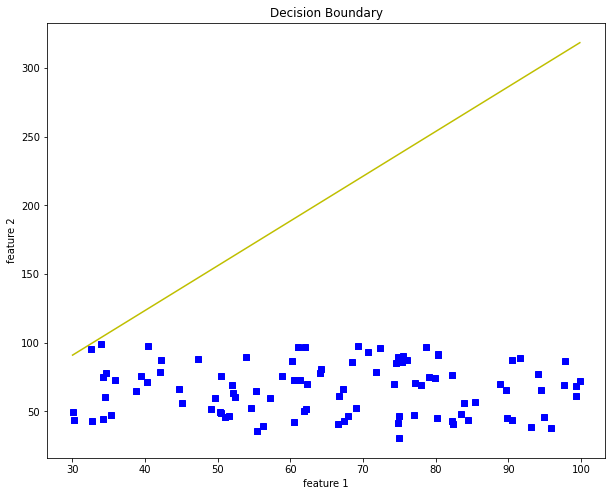

In [167]:
plot_decision_boundary(X, parameters, mlr.b)

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, Y_train, Y_test = train_test_split(
      X, y, test_size = 1/3, random_state = 0 )

In [61]:
print(X_train.shape)
print(Y_train.shape)

(66, 2)
(66, 1)


In [62]:
mlr.fit(X_train, Y_train)

In [63]:
print(mlr.w.shape)
parameters = mlr.w.T[0]
print(parameters.shape)
print(parameters)

(2, 1)
(2,)
[2.77609241 0.43856057]


In [64]:
model1 = LogisticRegression()    
model1.fit(X, y)
print(model1.score(X, y))

0.89


In [65]:
model2 = MyLogisticRegression()    
model2.fit(X, y)
print(model2.score(X, y))

0.62


In [66]:
mylr = MyLogisticRegression() 
mylr.fit(X_train, Y_train)
print(mylr.score(X_test, Y_test))

0.6764705882352942


In [67]:
sklr = LogisticRegression() 
sklr.fit(X_train, Y_train)
print(sklr.score(X_test, Y_test))

0.8823529411764706


In [81]:
# load the data from the file
data = pd.read_csv("../../datasets/diabetes.csv")

X = data.iloc[:,:-1].values
y = data.iloc[:,-1:].values

print(X.shape)
print(y.shape)
data.head

(108, 8)
(108, 1)


<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
103            1       81             72             18       40  26.6   
104            2       85             65              0        0  39.6   
105            1      126             56             29      152  28.7   
106            1       96            122              0        0  22.4   
107            4      144             58             28      140  29.5   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50 

In [83]:
X_train, X_test, Y_train, Y_test = train_test_split(
      X, y, test_size = 1/3, random_state = 0 )

In [84]:
sklr = LogisticRegression() 
sklr.fit(X_train, Y_train)
print(sklr.score(X_test, Y_test))

0.6111111111111112


In [85]:
mylr = MyLogisticRegression() 
mylr.fit(X_train, Y_train)
print(mylr.score(X_test, Y_test))

0.5277777777777778
